# Quantitative Finance Model using Donadio and Ghosh Learn Algorithmic Trading Chapter 4 Dual Moving Average Example
### David Lowe
### August 18, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the Dual Moving Average example found in chapter four of the book Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh. The script seeks to validate the Python environment and package requirements for running these code examples successfully. The eventual goal is to integrate various example code segments from the book into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Sharadar US Equities and Fund Prices from Quandl/Nasdaq Data Link

Source and Further Discussion of the Code Examples: https://github.com/PacktPublishing/Learn-Algorithmic-Trading

# Task 1 - Prepare Environment

## 1.a) Load the required packages and modules

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

## 1.b) Set up the controlling parameters and functions

In [2]:
# Specify the key modeling parameters below
DATA_STORE = '../sharadar.h5'
ticker_symbol = 'GOOGL'

MODEL_START_DATE = date(2014, 1, 1)
print("Starting date for the model:", MODEL_START_DATE)

# MODEL_END_DATE = datetime.now().date()
MODEL_END_DATE = date(2018, 12, 31)
print("Ending date for the model:", MODEL_END_DATE)

Starting date for the model: 2014-01-01
Ending date for the model: 2018-12-31


# Task 2 - Acquire and Pre-Process Data

## Instead of using pandas-datareader like in the book example, this script will use another commercial data source.

In [3]:
with pd.HDFStore(DATA_STORE) as store:
    goog_data = (store['quandl/sharadar/sep'].loc[[ticker_symbol], ['open', 'high', 'low', 'close', 'volume']])
goog_data.reset_index(level=0, inplace=True)
goog_data.sort_index(inplace=True)
goog_data = goog_data[MODEL_START_DATE:MODEL_END_DATE]
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  1258 non-null   object 
 1   open    1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   close   1258 non-null   float64
 5   volume  1258 non-null   float64
dtypes: float64(5), object(1)
memory usage: 68.8+ KB


# Task 3 - Set up the Helper Functions for Modeling

In [4]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['close'].\
        rolling(window=short_window,
                min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['close'].\
        rolling(window=long_window,
                min_periods=1, center=False).mean()
    signals['signal'][short_window:] =\
        np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

In [5]:
def plot_chart(symbol_price, trade_strategy):
     fig = plt.figure(figsize=(16, 10))
     ax1 = fig.add_subplot(111, ylabel='Google price in $')
     symbol_price["close"].plot(ax=ax1, color='g', lw=.5)
     trade_strategy["short_mavg"].plot(ax=ax1, color='r', lw=2.)
     trade_strategy["long_mavg"].plot(ax=ax1, color='b', lw=2.)

     ax1.plot(ts.loc[ts.orders== 1.0].index,
              symbol_price["close"][trade_strategy.orders == 1.0],
              '^', markersize=7, color='k')

     ax1.plot(ts.loc[ts.orders== -1.0].index,
              symbol_price["close"][trade_strategy.orders == -1.0],
              'v', markersize=7, color='k')

     plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
     plt.title("Double Moving Average Trading Strategy")

     plt.show()

# Task 4 - Build Model

In [6]:
ts = double_moving_average(goog_data, 20, 100)

# Task 5 - Evaluate Model Performance

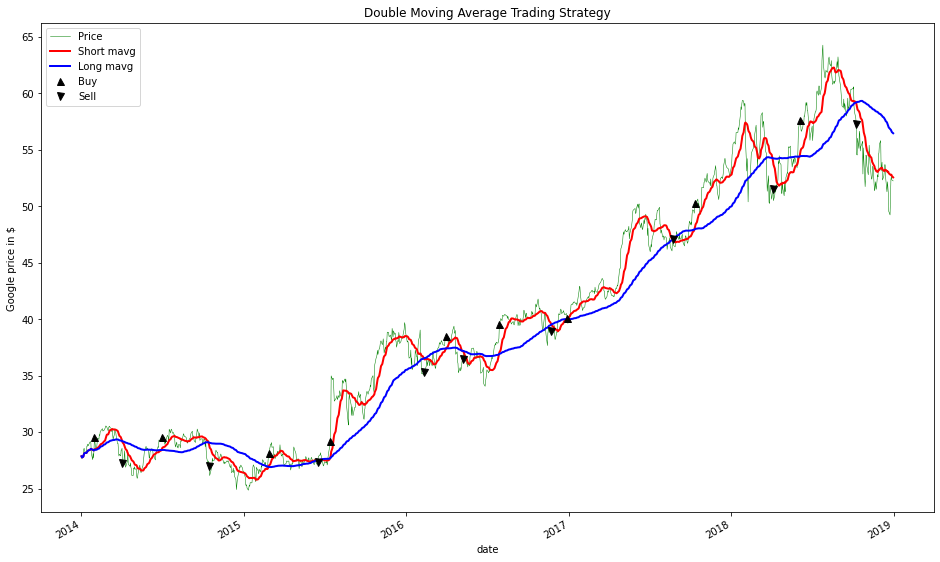

In [7]:
plot_chart(goog_data, ts)